In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [5]:
train = pd.read_csv("dataset/numerical_train.csv")
train_labels = pd.read_csv("dataset/train_labels.csv")
sub = pd.read_csv("dataset/numerical_sub.csv")

In [6]:
# remove building id

easy_train = train.drop(["building_id"], axis=1)
easy_sub = sub.drop(["building_id"], axis=1)
train_labels = train_labels.drop(["building_id"], axis=1)

In [7]:
# split into train test 

X_train, X_test, y_train, y_test = train_test_split(easy_train, train_labels, test_size=0.10, random_state=42)


# No Data Processing Except One-Hot Encoding Categorical Variables

In [5]:
# KNN
scores = []
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

/Users/nataliewang/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Users/nataliewang/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Users/nataliewang/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Users/nataliewang/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

In [60]:
scores

[0.45543148766355857,
 0.46797897241088215,
 0.4565826330532213,
 0.5077318598672346,
 0.4964122635355512,
 0.507348144737347,
 0.5141015310233682,
 0.5198572579716818,
 0.5192816852768505]

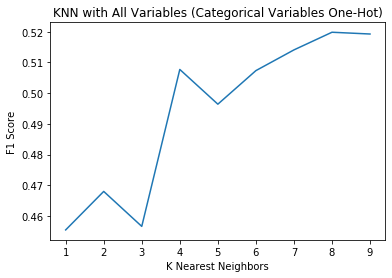

In [6]:
plt.plot(range(1, 10), scores)
plt.title("KNN with All Variables (Categorical Variables One-Hot)")
plt.xlabel("K Nearest Neighbors")
plt.ylabel("F1 Score");

# Dimensionality Reduction

In [8]:
# with inspiration from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

# standardize features
x = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

In [2]:
# try knn with standardized features

# knn_s = KNeighborsClassifier(n_neighbors=3)
# knn_s.fit(x, y_train)
# knn_s.score(x_test, y_test)

In [9]:
# project to 2D with PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
pc_test = pca.transform(x_test)
principal_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
principal_df.head()

,PC1,PC2
0,-0.960507,2.532134
1,0.905872,-0.863586
2,-0.302507,-3.036411
3,-2.026400,-0.336994
4,-1.964771,-0.214534


In [10]:
# add back values

final_df = pd.concat([principal_df, y_train], axis=1)
final_df.head()

,PC1,PC2,damage_grade
0,-0.960507,2.532134,3.0
1,0.905872,-0.863586,2.0
2,-0.302507,-3.036411,3.0
3,-2.026400,-0.336994,2.0
4,-1.964771,-0.214534,3.0


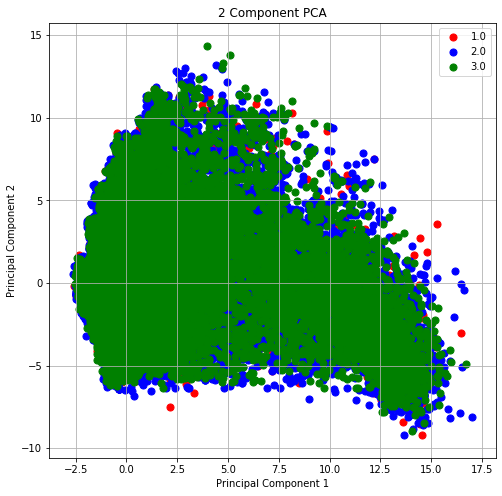

In [11]:
# visualize 2D projection

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("2 Component PCA")

targets = [1.0, 2.0, 3.0]
colors = ["r", "b", "g"]

for target, color in zip(targets, colors):
    keep = final_df["damage_grade"] == target
    ax.scatter(final_df.loc[keep, "PC1"], 
               final_df.loc[keep, "PC2"], 
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()

In [12]:
# try knn with 2 PCs

pca2_knn = KNeighborsClassifier(n_neighbors=8)
pca2_knn.fit(principal_df, y_train)

/Users/nataliewang/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [13]:
# score

pca2_knn.score(pc_test, y_test)

0.5514370131614289

In [58]:
# try pca with varying numbers of principal components

pca_v = PCA(0.30)
pca_v.fit(x)

PCA(copy=True, iterated_power='auto', n_components=0.3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [59]:
pca_v.n_components_

7

In [60]:
# apply mapping to train set and test set

train_pca = pca_v.transform(x)
test_pca = pca_v.transform(x_test)

In [67]:
# apply knn to transformed data

pca_knn = KNeighborsClassifier(n_neighbors=15, weights="distance")
pca_knn.fit(train_pca, y_train)

/Users/nataliewang/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [68]:
# find score

pca_knn.score(test_pca, y_test)

0.6383484900809638